# Association Rules Problem 2

Prepare rules for the books dataset 

- Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
- Change the minimum length in apriori algorithm
- Visulize the obtained rules using different plots 

## Steps:

1. Import new data set
    - understand the dataset, look into it. 
    - check data info and null values.
    - tranform to transactional form.
2. Rule Set 1
    - perform apriopri algorithm with different confidence and support values
    - NetworkX Visualizations
3. Rule Set 2
    - perform apriopri algorithm with different confidence and support values
    - NetworkX Visualizations
4. Rule Set 3
    - perform apriopri algorithm with different confidence and support values
    - NetworkX Visualizations
5. Rule Set 4
    - perform apriopri algorithm with different confidence and support values
    - NetworkX Visualizations
6. Conclusion


## Import New Dataset

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
raw_data = pd.read_csv("C:/Users/Srupin/Assignments/9_Association_Rules/9Q2/book.csv")
df = raw_data.copy()
df #This is in transaction form.
# No requirement to apply further transactions.

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


<AxesSubplot:>

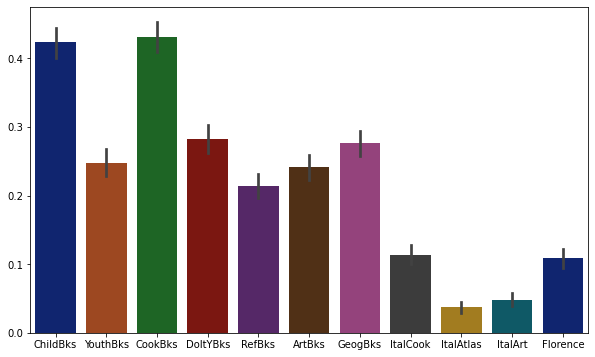

In [4]:
fig, ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df,palette='dark')

Text(0.5, 1.0, 'Values counts of books')

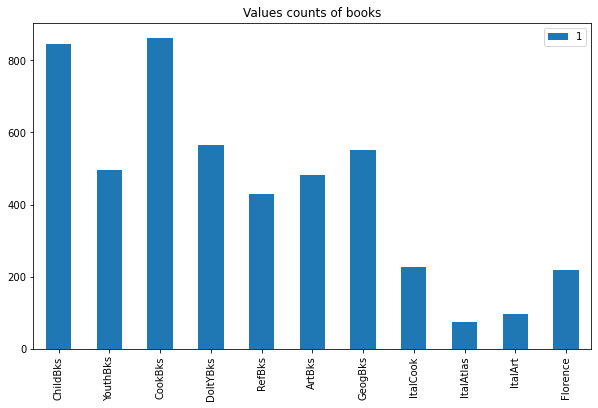

In [5]:
count_num = df.apply(pd.Series.value_counts).loc[1]
z = pd.DataFrame(count_num)
z.plot(kind="bar", figsize=(10,6),style='fast')
plt.title('Values counts of books')

## Rule Set 1
- min_support = 0.3
- confidence = 100%

##### Apriori Algorithm - All subsets of a frequent Item set should also be frequent

In [6]:
frequent_itemsets1 = apriori(df,min_support=0.3,use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1 #Only uptil 1-item itemsets

,support,itemsets,length
0,0.423,(ChildBks),1
1,0.431,(CookBks),1


In [7]:
rules1 = association_rules(frequent_itemsets1, min_threshold=1) #confidence = 100%
rules1.head() #Rule Set1 There are no rules for these metrics

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


### Visualizations

## Rule Set 2
- min_support = 0.2
- confidence = 60%

In [8]:
frequent_itemsets2 = apriori(df,min_support=0.2,use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2 #Only uptil 2-item itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


In [9]:
rules2 = association_rules(frequent_itemsets2, min_threshold=0.60) #confidence = 60%
rules2.head() #Rule Set2 only one single rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


### Visualizations

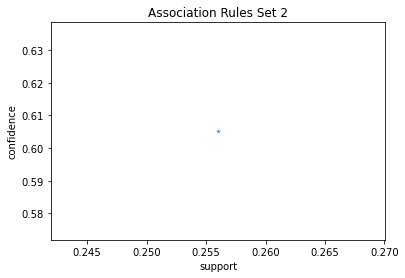

In [10]:
support = rules2.support
confidence=rules2.confidence
 
sns.scatterplot(data=rules2, x = support, y = confidence,  marker="*",palette='Dark')
plt.title("Association Rules Set 2")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

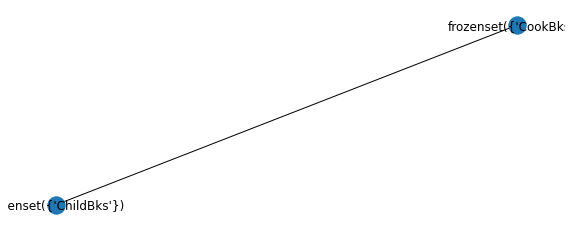

In [11]:
#NetworkX Visualization
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules2,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

## Rule Set 3
- min_support = 0.2
- confidence = 40%

In [12]:
frequent_itemsets3 = apriori(df,min_support=0.2,use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3 

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


In [13]:
rules3 = association_rules(frequent_itemsets3, min_threshold=0.40) #confidence = 40%
rules3.head() #Rule Set3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


### Visualizations

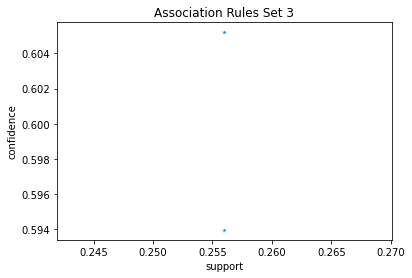

In [14]:
support = rules3.support
confidence=rules3.confidence
 
sns.scatterplot(data=rules3, x = support, y = confidence,  marker="*",palette='Dark')
plt.title("Association Rules Set 3")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

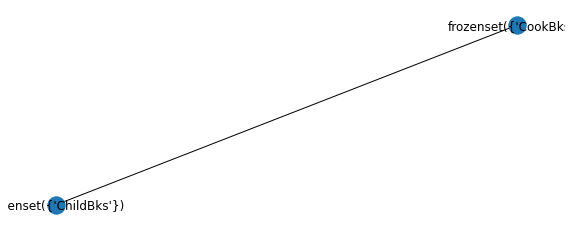

In [15]:
#NetworkX Visualization
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules3,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

## Rule Set 4
- min_support = 0.1
- confidence = 60%

In [16]:
frequent_itemsets4 = apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets4['length'] = frequent_itemsets4['itemsets'].apply(lambda x: len(x))
frequent_itemsets4 #Only uptil 3-item itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(ChildBks, YouthBks)",2


In [17]:
rules4 = association_rules(frequent_itemsets4, min_threshold=0.60) #confidence = 60%
rules4.head() #Rule Set4  has 4 rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427


### Visualizations

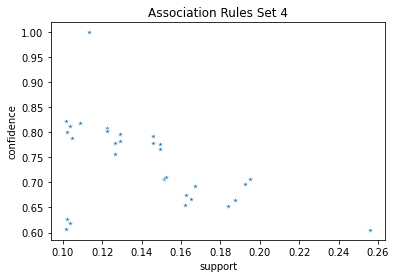

In [18]:
support = rules4.support
confidence=rules4.confidence
 
sns.scatterplot(data=rules4, x = support, y = confidence,  marker="*",palette='Dark')
plt.title("Association Rules Set 4")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

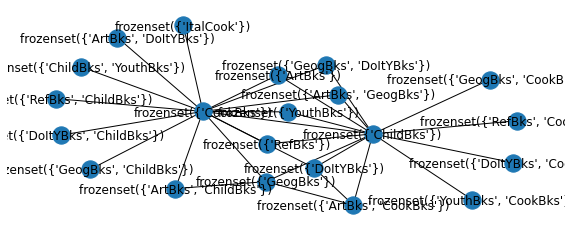

In [19]:
#NetworkX Visualization
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules4,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

## Conclusion
- Initial dataset was examined and transaction form was created.
- Four sets of Rules were generated for different values of support and confidence.
- Network Visualizations were plotted for each set.
- Only viable rule set with decent support and confidence is rule set 2. The rest of the rules have very poor values.